<a href="https://colab.research.google.com/github/zarbiaa/Mastering-Python-for-Finance-source-codes/blob/master/Vasicek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

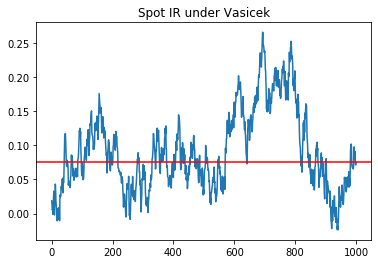

In [10]:
""" Simulate interest rate path by the Vasicek model """
import numpy as np

def vasicek(r0, alpha, gamma, rho, T=1., N=10, seed=777):    
    np.random.seed(seed)
    dt = T/float(N)    
    rates = [r0]
    for i in range(N):
        dr = alpha*(gamma-rates[-1])*dt + rho*np.random.normal()
        rates.append(rates[-1] + dr)
    return range(N+1), rates

if __name__ == "__main__":
    gamma = 0.075
    x, y = vasicek(0.01875, 0.20, gamma, 0.012, 100., 1000)

    import matplotlib.pyplot as plt
    plt.plot(x,y)
    plt.axhline(y=gamma, color='r', linestyle='-')
    plt.title("Spot IR under Vasicek")
    plt.show()

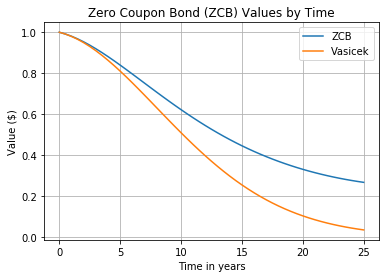

In [37]:
import numpy as np

""" Get zero coupon bond price by Vasicek model """
#tau : time to maturity
def exact_zcb(theta, alpha, sigma, tau, r0=0.):
    B = (1 - np.exp(-alpha*tau)) / alpha
    A = np.exp((theta-(sigma**2)/(2*(alpha**2))) *
               (B-tau) - (sigma**2)/(4*alpha)*(B**2))
    return A * np.exp(-r0*B)

import math
def exercise_value(K, R, t):
    return K*math.exp(-R*t)

""" 
Returns the R(+l'inf) the term structure for a ZC bond with infinite maturity
"""
def R_inf(gamma, rho, alpha, sharp_ratio):
  return gamma + ((rho*sharp_ratio)/alpha) -0.5*(rho**2)/(alpha**2)

"""
Get zero coupon bond price by Vasicek Model (Vasicek paper)
@param tau : time to maturity of  the ZC bond
"""
def Vasicek_ZC(gamma, alpha, rho, tau, sharp_ratio, r):
  B =  1 - np.exp(-alpha*tau)
  Rinf = R_inf(gamma, rho, alpha, sharp_ratio)
  # print(Rinf)
  return np.exp((1/alpha) * B * (Rinf - r) - tau * Rinf - (rho**2/4*(alpha**3))*(B**2))


if __name__ == "__main__":
    Ts = np.r_[0.0:25.5:0.5]
    zcbs = [exact_zcb(0.5, 0.02, 0.03, t, 0.015) for t in Ts]
    Vasicek_values = [Vasicek_ZC(0.5, 0.02, 0.03, t, 0.8, 0.015) for t in Ts]
    import matplotlib.pyplot as plt
    plt.title("Zero Coupon Bond (ZCB) Values by Time")
    plt.plot(Ts, zcbs, label='ZCB')
    plt.plot(Ts, Vasicek_values, label="Vasicek")
    plt.ylabel("Value ($)")
    plt.xlabel("Time in years")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Ks = [exercise_value(0.95, 0.015, t) for t in Ts]
    # plt.title("Zero Coupon Bond (ZCB) "
    #           "and Strike (K) Values by Time")
    # plt.plot(Ts, zcbs, label='ZCB')
    # plt.plot(Ts, Ks, label='K', linestyle="--", marker=".")
    # plt.ylabel("Value ($)")
    # plt.xlabel("Time in years")
    # plt.legend()
    # plt.grid(True)
    # plt.show()

0.515
0.51875
0.513125
0.53


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


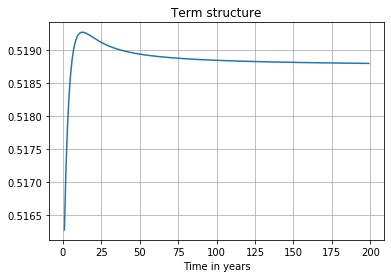

In [74]:
"""
Simulation of the IR term structure under the Elastic  Vasicek Model
@param r represents the value of the spot interest rate at the time t
"""

def term_structure(gamma, rho, alpha, sharp_ratio, maturity, r):
  Rinf = R_inf(gamma, rho, alpha, sharp_ratio)
  # print(Rinf)
  A = 1 - np.exp(-alpha * maturity)
  return_val = Rinf + (r - Rinf) * (1/(alpha * maturity)) * A + ((rho**2)/(4 * (alpha**3) * maturity)) * (A**2)
  # print(return_val, maturity) 
  return return_val


"""
Here we will plot the term structure under the Vasicek model 
""" 
Ts = np.r_[0.0:200:1]
gamma = 0.5
alpha = 0.2
rho = 0.03
sharp_ratio = 0.2
r_t = 0.515
Term_struct = [term_structure(gamma, rho, alpha, sharp_ratio, maturity, r_t) for maturity in Ts]
# print(Term_struct)
print(r_t)
print(R_inf(gamma, rho, alpha, sharp_ratio))

print(R_inf(gamma, rho, alpha, sharp_ratio) - 0.25 *(rho**2/alpha**2))

print(R_inf(gamma, rho, alpha, sharp_ratio) + 0.5 *(rho**2/alpha**2))

#plot
import matplotlib.pyplot as plt
plt.title("Term structure")
plt.plot(Ts, Term_struct)
plt.xlabel("Time in years")
plt.grid(True)
plt.show()

